# Gabriel (Daeyoung) Yoo - Python, Data Analysis(EDA) and Planning

## Agenda
### 1. Business Snapshot
### 2. Women's Department Review
### 3. Sales Forecasting with Machine Learning

### This is a portfolio demonstrating how to use Python(coding & computer language) in Data Analysis, and Merchandise planning
### Below analysis is conducted for a fashion retail company with around #4000 stores. This data is altered due to privacy reason. 

# Import Data

In [1]:
import plotly 
plotly.tools.set_credentials_file(username='gmjj018', api_key='ztWetyuhbQjDa6dRpzP8')
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.presentation_objs as pres
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import Series
pd.options.display.float_format = '{:,}'.format
from IPython.display import display, HTML
writer = pd.ExcelWriter('GY_Report.xlsx', engine='xlsxwriter')
pd.set_option('precision', 2)
idx = pd.IndexSlice
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import matplotlib.image as mpimg 
import nbconvert
import warnings
init_notebook_mode(connected=True)

C:\Users\gmjj0\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\gmjj0\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [2]:
df2019 = pd.read_csv('19SS Data.txt',sep='\\t',engine='python',names=['Fineline Number','Prime Item Desc',
                                                                                         'Vendor Stk Nbr','Color Desc','Size Desc',
                                                                                         'Unit Cost','WM Week','POS Qty','Net Ship Qty',
                                                                                         'Net Ship Retail','POS Sales','Sat Qty',
                                                                                         'Sun Qty','Mon Qty','Tue Qty','Wed Qty','Thu Qty',
                                                                                        'Fri Qty','Sat Sales','Sun Sales','Mon Sales',
                                                                                        'Tue Sales','Wed Sales','Thu Sales','Fri Sales'],
                  index_col=False)
store2019 = pd.read_csv('19ss store data.txt',sep='\\t',engine='python',names=[
    'POS Sales','Net Ship Qty','POS Qty','Fineline Number','Prime Item Desc','Unit Cost','Vendor Stk Nbr','Color Desc','Size Desc',
    'MDSE Major Zone','Apparel Store Dept Size Class','Store-Dept Size Class','Store-Dept Sales Class','State','City','Sales Class','Store Nbr'],
                        index_col=False)
history = pd.read_csv('history F.txt',sep='\\t',engine='python',names=['WM Week','Fineline Number',
            'Color Desc','Size Desc','Sat Sales','Sun Sales','Mon Sales','Tue Sales','Wed Sales','Thu Sales','Fri Sales','Sat Qty',
                                                                                         'Sun Qty','Mon Qty','Tue Qty','Wed Qty','Thu Qty','Fri Qty'
                                                                                          ,'Net Ship Qty'
                                                                                           ],index_col=False)
dfzone2019 = pd.read_excel('WM Zone Sales and Net ship 2.xlsx', skiprows=38)
storedf = store2019.copy()

print("Frist Data Rows and Columns",df2019.shape)
print("Second Data Total Rows and Columns",store2019.shape)
print("Thrid Data Total Rows and Columns",history.shape)
print("Last Data Total Rows and Columns", dfzone2019.shape)
print("Total Data # is 10M Rows and 25 Colums")

Frist Data Rows and Columns (55509, 25)
Second Data Total Rows and Columns (8934773, 17)
Thrid Data Total Rows and Columns (1075925, 19)
Last Data Total Rows and Columns (15732, 7)
Total Data # is 10M Rows and 25 Colums


### With 10M Rows and 25 columns, coding is a more effective option to conduct analysis. Similar exercise would take much more time and repetitive steps to be accomplished in Excel. Python not only provides more capacity but also the convenience of automated updates.

In [3]:
storecount = pd.read_excel('Store Count - GY.xlsx')
storecount.drop(['Item','2T'],axis=1,inplace=True)
storecount = storecount.rename({'Item Name':'Prime Item Desc','Fineline':'Fineline Number','Color':'Color Desc','Grand Total':'Store Count'},axis='columns')
storecount = df2019.merge(storecount, on=['Prime Item Desc','Fineline Number','Color Desc'], how='right')

## Clean and Prepare Data
### Due to common errors that exist in dataset such as missing values, outliers, and various data formats that different businesses have, cleaning and preparing data is an essential step to ensure accuracy and relevancy.

In [39]:
col4 = ['Sat Sales', 'Sun Sales', 'Mon Sales', 'Tue Sales',
       'Wed Sales', 'Thu Sales', 'Fri Sales', 'Sat Qty', 'Sun Qty', 'Mon Qty',
       'Tue Qty', 'Wed Qty', 'Thu Qty', 'Fri Qty']
conv = {'01.0':'Feb', '02.0':'Feb', '03.0':'Feb', '04.0':'Feb', '05.0':'Mar', '06.0':'Mar', '07.0':'Mar', '08.0':'Mar', '09.0':'Mar', '10.0':'Apr', '11.0':'Apr',
       '12.0':'Apr', '13.0':'Apr', '14.0':'May', '15.0':'May', '16.0':'May', '17.0':'May', '18.0':'Jun', '19.0':'Jun', '20.0':'Jun', '21.0':'Jun', '22.0':'Jun',
       '23.0':'Jul', '24.0':'Jul', '25.0':'Jul', '26.0':'Jul', '27.0':'Aug', '28.0':'Aug', '29.0':'Aug', '30.0':'Aug', '31.0':'Sep', '32.0':'Sep', '33.0':'Sep',
       '34.0':'Sep', '35.0':'Sep', '36.0':'Oct', '37.0':'Oct', '38.0':'Oct', '39.0':'Oct', '40.0':'Nov', '41.0':'Nov', '42.0':'Nov', '43.0':'Nov', '44.0':'Dec',
       '45.0':'Dec', '46.0':'Dec', '47.0':'Dec', '48.0':'Dec', '49.0':'Jan', '50.0':'Jan', '51.0':'Jan', '52.0':'Jan'}

classgroup = {1295:'SS Seasonal Men',2308:'SS Seasonal Acc',2316:'Acc',
              5007:'SS Seasonal Women',5008:'SS Seasonal Women',5458:'Women',5459:'Women',5461:'Women',
              5468:'Women',596:'Acc',597:'Acc',6013:'Men', 6024:'Women', 6101:'Men', 6106:'Men', 6126:'Men',
              5469:'Women',5460:'Women',614:'Acc', 6210:'Acc', 6340:'Acc',65:'Men',6500:'Acc',66:'Men', 6670:'Women', 
             6671:'Women', 6691:'Women', 7001:'Acc'}

subclass = {1295:'Swim Wear Men', 2308:'Swim Acc', 2316:'Small Leather', 5007:'Swim Wear Women', 5008:'Swim Wear Women', 5458:'Active Wear',
            5459:'Coat', 5460:'Short', 5461:'Top', 5468:'Skirt', 5469:'Sweater',
       596:'Heel',  597:'Sneaker', 6013:'Basic', 6024:'Jean', 6101:'Pants', 6106:'Coat', 6126:'Sweater',  614: 'Other Bag', 6210:'Boots', 6340:'Flat',   65:'Short',
     6500:'Scarf',   66:'Suit', 6670:'Dress', 6671:'Jacket', 6691:'Pants', 7001:'Handbag'}

cost = {597:2.58,596:1.80,2316:1.80,6340:1.60,614:1.60,65:1.67,66:1.67,6013:2.45,6126:2.45,6101:2.72,6106:2.72,6670:2.32,6024:2.32,5468:1.57,5459:1.48,
        6691:2.32,6671:2.32,5469:1.57,5458:1.48,2308:2.84,1295:3.07,5007:2.78,5008:2.78,7001:2.58,6210:2.69,5460:1.48,5461:1.57,6500:2.63}

retailprice = {6670:4.48,6024:4.48,5468:3.48,5459:2.88,6691:4.48,6671:4.48,5469:3.48,5460:3.48,5460:2.88, 7001:4.48, 597:4.48, 596:3.48,
               2316:3.48,6340:2.88,614:2.88,65:2.88,66:2.88,6013:3.48,6126:3.48,6101:4.48,6106:4.48,6101:4.48
              }
size = {'2T':'6', '3T':'8', '4T':'10', '5T':'12', '0/3M':'00', '12M':'2', '18M':'4', '24M':'6', '3/6M':'0','6/9M':'1'}
fixture = {'Table':2,'H-Rack':1,'4-Way':1}


for x in col4:
    history[x] = history[x].astype(np.float64)

history['WM Week'] = history['WM Week'].apply(str)
history['Week'] = history['WM Week'].str[4:]
history['Year'] = history['WM Week'].str[:4]
history['Size Desc'] = history['Size Desc'].replace(size)
history['Department'] = history['Fineline Number'].map(classgroup)
history['Class'] = history['Fineline Number'].map(subclass)

df2019['WM Week'] = df2019['WM Week'].apply(str)
df2019['Week'] = df2019['WM Week'].str[4:]
df2019['Year'] = df2019['WM Week'].str[:4]
df2019 = df2019.dropna(subset=['WM Week'])
df2019 = df2019.dropna()
df2019['Month'] = df2019['Week'].map(conv)
df2019['Total Sales'] = df2019['Sat Sales'] + df2019['Sun Sales'] + df2019['Mon Sales']+ df2019['Tue Sales']+ df2019['Wed Sales']+ df2019['Thu Sales']+ df2019['Fri Sales']
df2019['Total Qty'] =df2019['Sat Qty'] + df2019['Sun Qty'] + df2019['Mon Qty']+ df2019['Tue Qty']+ df2019['Wed Qty']+ df2019['Thu Qty']+ df2019['Fri Qty']
df2019['Size Desc'] = df2019['Size Desc'].replace(size)
df2019['Department'] = df2019['Fineline Number'].map(classgroup)
df2019['Class'] = df2019['Fineline Number'].map(subclass)
df2019['Unit Cost'] = df2019['Fineline Number'].map(cost)
df2019['Retail Price'] = df2019['Fineline Number'].map(retailprice)
df2019['IMU'] = (df2019['Retail Price'] - df2019['Unit Cost']) / df2019['Retail Price']
df2019['Net Ship Qty at Cost'] = (df2019['Net Ship Qty']* df2019['Unit Cost'])
df2019['Net Ship Qty at Retail'] = (df2019['Net Ship Qty']* df2019['Retail Price'])
df2019['Total Cost'] = df2019['Total Qty'] * df2019['Unit Cost']
df2019['Gross Margin'] = (df2019['Total Sales'] - df2019['Total Cost']) / df2019['Total Sales']
df2019['Gross Margin $'] = (df2019['Total Sales'] - df2019['Total Cost'])

dfzone2019['WM Week'] = dfzone2019['WM Week'].apply(str)
dfzone2019['Week'] = dfzone2019['WM Week'].str[4:]
dfzone2019['Year'] = dfzone2019['WM Week'].str[:4]
dfzone2019['Department'] = dfzone2019['Fineline Number'].map(classgroup)
dfzone2019['Class'] = dfzone2019['Fineline Number'].map(subclass)

storedf['Department'] = storedf['Fineline Number'].map(classgroup)
storedf['Class'] = storedf['Fineline Number'].map(subclass)
storedf['Size Desc'] =storedf['Size Desc'].replace(size)
storedf = storedf.rename({'POS Sales':'Total Sales','POS Qty':'Total Qty'},axis='columns')


In [42]:
col = ['Sat Qty','Sat %','Sun MV 4YR','Sun Qty','Sun %','Mon MV 4YR','Mon Qty','Mon %','Tue MV 4YR','Tue Qty','Tue %',
       'Wed MV 4YR','Wed Qty','Wed %','Thu MV 4YR','Thu Qty','Thu %','Fri MV 4YR','Fri Qty','Fri %','Sat MV 4YR','Total Qty']
col13 = ['2014', '14 Var LW', '2015','15 Var LY','15 Var LW','2016','16 Var LY','16 Var LW','2017','17 Var LY','17 Var LW', '2018','18 Var LY','18 Var LW','2019','19 Var LY','19 Var LW']
col14 = ['14 Var LW','15 Var LY','15 Var LW','16 Var LY','16 Var LW','17 Var LY','17 Var LW','18 Var LY','18 Var LW','19 Var LY','19 Var LW'] 
conv = {'01.0':'Feb', '02.0':'Feb', '03.0':'Feb', '04.0':'Feb', '05.0':'Mar', '06.0':'Mar', '07.0':'Mar', '08.0':'Mar', '09.0':'Mar', '10.0':'Apr', '11.0':'Apr',
       '12.0':'Apr', '13.0':'Apr', '14.0':'May', '15.0':'May', '16.0':'May', '17.0':'May', '18.0':'Jun', '19.0':'Jun', '20.0':'Jun', '21.0':'Jun', '22.0':'Jun',
       '23.0':'Jul', '24.0':'Jul', '25.0':'Jul', '26.0':'Jul', '27.0':'Aug', '28.0':'Aug', '29.0':'Aug', '30.0':'Aug', '31.0':'Sep', '32.0':'Sep', '33.0':'Sep',
       '34.0':'Sep', '35.0':'Sep', '36.0':'Oct', '37.0':'Oct', '38.0':'Oct', '39.0':'Oct', '40.0':'Nov', '41.0':'Nov', '42.0':'Nov', '43.0':'Nov', '44.0':'Dec',
       '45.0':'Dec', '46.0':'Dec', '47.0':'Dec', '48.0':'Dec', '49.0':'Jan', '50.0':'Jan', '51.0':'Jan', '52.0':'Jan'}
col12 = ['14 Var LM','15 Var LM','15 Var LY','16 Var LM','16 Var LY','17 Var LM','17 Var LY','18 Var LM','18 Var LY','19 Var LM','19 Var LY']
history = history.round()
history['Total Sales'] = history['Sat Sales'] + history['Sun Sales'] + history['Mon Sales']+ history['Tue Sales']+ history['Wed Sales']+ history['Thu Sales']+ history['Fri Sales']
history['Total Qty'] =history['Sat Qty'] + history['Sun Qty'] + history['Mon Qty']+ history['Tue Qty']+ history['Wed Qty']+ history['Thu Qty']+ history['Fri Qty']
history['Month'] = history['Week'].map(conv)


historyweek = history.pivot_table(index='Week',columns='Year',values='Total Qty',aggfunc=np.sum)
df2019week = df2019.pivot_table(index='Week', columns='Year',values='Total Qty',aggfunc=np.sum)
df2019week = df2019week.drop('2018',axis=1)
totalweek = pd.concat([historyweek,df2019week],axis=1,sort=False).round()
totalweek['14 Var LW'] = totalweek['2014'].pct_change()
totalweek['15 Var LY'] = totalweek.pct_change(axis='columns')['2015']
totalweek['15 Var LW'] = totalweek['2015'].pct_change()
totalweek['16 Var LY'] = totalweek.pct_change(axis='columns')['2016']
totalweek['16 Var LW'] = totalweek['2016'].pct_change()
totalweek['17 Var LY'] = totalweek.pct_change(axis='columns')['2017']
totalweek['17 Var LW'] = totalweek['2017'].pct_change()
totalweek['18 Var LY'] = totalweek.pct_change(axis='columns')['2018']
totalweek['18 Var LW'] = totalweek['2018'].pct_change()

historydaily = history.drop(['Sat Sales', 'Sun Sales', 'Mon Sales', 'Tue Sales',
       'Wed Sales', 'Thu Sales', 'Fri Sales','Total Sales'],axis=1)
df2019daily = df2019.drop(['Sat Sales', 'Sun Sales', 'Mon Sales', 'Tue Sales',
       'Wed Sales', 'Thu Sales', 'Fri Sales','Total Sales'],axis=1)
historydaily = historydaily.pivot_table(index=['Week','Year'],aggfunc= np.sum)
df2019daily = df2019daily.pivot_table(index=['Week','Year'],aggfunc = np.sum)
df2019daily = df2019daily.round()
historydaily = historydaily.reindex(col, axis=1)
df2019daily = df2019daily.reindex(col, axis=1)
totaldaily = pd.concat([historydaily,df2019daily]).sort_index()
totaldaily = pd.concat([historydaily,df2019daily]).sort_index()
totaldaily['Sun %'] = (totaldaily['Sun Qty'] - totaldaily['Sat Qty']) / totaldaily['Sun Qty']
totaldaily['Mon %'] = (totaldaily['Mon Qty'] - totaldaily['Sun Qty']) / totaldaily['Mon Qty']
totaldaily['Tue %'] = (totaldaily['Tue Qty'] - totaldaily['Mon Qty']) / totaldaily['Tue Qty']
totaldaily['Wed %'] = (totaldaily['Wed Qty'] - totaldaily['Tue Qty']) / totaldaily['Wed Qty']
totaldaily['Thu %'] = (totaldaily['Thu Qty'] - totaldaily['Wed Qty']) / totaldaily['Thu Qty']
totaldaily['Fri %'] = (totaldaily['Fri Qty'] - totaldaily['Thu Qty']) / totaldaily['Fri Qty']
totaldaily['Sat %'] = (totaldaily['Sat Qty'] - totaldaily['Fri Qty']) / totaldaily['Sat Qty']
totaldaily['Sun MV 4YR']= totaldaily['Sun %'].shift().rolling(4).mean()
totaldaily['Mon MV 4YR']= totaldaily['Mon %'].shift().rolling(4).mean()
totaldaily['Tue MV 4YR']= totaldaily['Tue %'].shift().rolling(4).mean()
totaldaily['Wed MV 4YR']= totaldaily['Wed %'].shift().rolling(4).mean()
totaldaily['Thu MV 4YR']= totaldaily['Thu %'].shift().rolling(4).mean()
totaldaily['Fri MV 4YR']= totaldaily['Fri %'].shift().rolling(4).mean()
totaldaily['Sat MV 4YR']= totaldaily['Sat %'].shift().rolling(4).mean()

historymonth = history.pivot_table(index='Month',columns='Year',values='Total Qty',aggfunc=np.sum).reindex(['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan'])
df2019month = df2019.pivot_table(index='Month',columns='Year',values='Total Qty',aggfunc=np.sum).reindex(['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan'])
historymonth['14 Var LM'] = historymonth['2014'].pct_change()
historymonth['15 Var LY'] = historymonth.pct_change(axis='columns')['2015']
historymonth['15 Var LM'] = historymonth['2015'].pct_change()
historymonth['16 Var LY'] = historymonth.pct_change(axis='columns')['2016']
historymonth['16 Var LM'] = historymonth['2016'].pct_change()
historymonth['17 Var LY'] = historymonth.pct_change(axis='columns')['2017']
historymonth['17 Var LM'] = historymonth['2017'].pct_change()
historymonth['18 Var LY'] = historymonth.pct_change(axis='columns')['2018']
historymonth['18 Var LM'] = historymonth['2018'].pct_change()
historymonth['19 Var LM'] = historymonth['2019'].pct_change()
historymonth['19 Var LY'] = historymonth.pct_change(axis='columns')['2019']
cola = ['14 Var LM','15 Var LM','15 Var LY','16 Var LM','16 Var LY','17 Var LM','17 Var LY','18 Var LM','18 Var LY','19 Var LM','19 Var LY']
for x in cola:
    historymonth[x] = historymonth[x].astype(float).map("{:.2%}".format)
col3 = [
    '2019','19 Var LY','19 Var LM','2018','18 Var LY','18 Var LM','2017','17 Var LY','17 Var LM','2016','16 Var LY','16 Var LM',
    '2015','15 Var LY','15 Var LM','2014','14 Var LM']
historymonth = historymonth.reindex(col3,axis=1)

daily = df2019.drop(['Sat Sales', 'Sun Sales', 'Mon Sales', 'Tue Sales',
       'Wed Sales', 'Thu Sales', 'Fri Sales','Total Sales'],axis=1)
daily = daily.pivot_table(index=['Week','Year'],aggfunc = np.sum).reindex(col,axis=1)
daily.drop(daily[daily['Total Qty'] <10000 ].index, inplace=True)
daily = daily.reindex(index= ['47.0','48.0','49.0','50.0','51.0', '52.0','01.0', '02.0', '03.0', '04.0', '05.0', '06.0', '07.0', '08.0', '09.0','10.0', '11.0', '12.0',
                  '13.0', '14.0', '15.0', '16.0'],level='Week')
daily['Sun %'] = (daily['Sun Qty'] - daily['Sat Qty']) / daily['Sun Qty']
daily['Mon %'] = (daily['Mon Qty'] - daily['Sun Qty']) / daily['Mon Qty']
daily['Tue %'] = (daily['Tue Qty'] - daily['Mon Qty']) / daily['Tue Qty']
daily['Wed %'] = (daily['Wed Qty'] - daily['Tue Qty']) / daily['Wed Qty']
daily['Thu %'] = (daily['Thu Qty'] - daily['Wed Qty']) / daily['Thu Qty']
daily['Fri %'] = (daily['Fri Qty'] - daily['Thu Qty']) / daily['Fri Qty']
daily['Sat %'] = (daily['Sat Qty'] - daily['Fri Qty']) / daily['Sat Qty']
daily['Sun MV 4YR']= daily['Sun %'].shift().rolling(4).mean()
daily['Mon MV 4YR']= daily['Mon %'].shift().rolling(4).mean()
daily['Tue MV 4YR']= daily['Tue %'].shift().rolling(4).mean()
daily['Wed MV 4YR']= daily['Wed %'].shift().rolling(4).mean()
daily['Thu MV 4YR']= daily['Thu %'].shift().rolling(4).mean()
daily['Fri MV 4YR']= daily['Fri %'].shift().rolling(4).mean()
daily['Sat MV 4YR']= daily['Sat %'].shift().rolling(4).mean()
col2 = ['Sat %', 'Sun %','Mon %','Tue %','Wed %','Thu %','Fri %','Sat MV 4YR','Sun MV 4YR','Mon MV 4YR','Tue MV 4YR','Wed MV 4YR','Thu MV 4YR','Fri MV 4YR']
daily = daily.reindex(col, axis=1)
for x in col2:
    daily[x] = daily[x].astype(float).map("{:.2%}".format)
daily.round()

col2 = ['Sat %', 'Sun %','Mon %','Tue %','Wed %','Thu %','Fri %','Sat MV 4YR','Sun MV 4YR','Mon MV 4YR','Tue MV 4YR','Wed MV 4YR','Thu MV 4YR','Fri MV 4YR']
for x in col2:
    historydaily[x] = historydaily[x].astype(float).map("{:.2%}".format)
    df2019daily[x] = df2019daily[x].astype(float).map("{:.2%}".format)
    totaldaily[x] = totaldaily[x].astype(float).map("{:.2%}".format)

department = df2019.pivot_table(index=['Department','Class'],values=['Total Sales','Total Qty','Total Cost','Gross Margin','Net Ship Qty','IMU',
                                                                     'Net Ship Qty at Cost','Net Ship Qty at Retail','Gross Margin $'                                                                     
                                                                    ],
                               aggfunc={'Total Sales': np.sum, 'Total Cost': np.sum, 'Gross Margin' : np.mean, 'Net Ship Qty': np.sum,
                                        'IMU': np.mean, 'Net Ship Qty at Cost': np.sum, 'Net Ship Qty at Retail': np.sum,
                                        'Total Qty':np.sum, 'Gross Margin $': np.sum
                                       },fill_value=0)
#department = department.drop(['SS Seasonal Men','SS Seasonal Women','SS Seasonal Acc'], axis=0)
bom = df2019.groupby(['Month','Department','Class'])['Net Ship Qty'].sum()
bom = bom.loc['Dec']
department['EOH'] = department['Net Ship Qty'] - department['Total Qty']
department['GMROI'] = department['Gross Margin $'] / (((department['EOH'].add(bom,fill_value=0)) / 7) * (department['Total Cost'] / department['Total Qty']))
department['Turnover'] = ((department['Gross Margin $']) / (((department['EOH'].add(bom,fill_value=0)) / 7) * (department['Total Sales'] / department['Total Qty'])))
department['Sell-Th at Net Ship'] = department['Total Qty'] / (department['Net Ship Qty'])
department['Avg Sales by Weekly'] = department['Total Qty'] / 21
department['WOS'] = department['EOH'] / department['Avg Sales by Weekly']
department['Stock to Sales Ratio'] = department['Net Ship Qty'] / department['EOH']
colb=['IMU','Net Ship Qty','Net Ship Qty at Retail','Net Ship Qty at Cost','Total Qty','Total Cost','Total Sales','Stock to Sales Ratio','EOH',
'Sell-Th at Net Ship','Gross Margin','Gross Margin $','GMROI','Turnover','Avg Sales by Weekly','WOS',
     ]
department = department.reindex(colb,axis=1)
colc = ['EOH','Net Ship Qty','Total Qty','Gross Margin']
for x in colc:
    department[x] = department[x].astype(np.float)
department=department.round(2)

departmentbig = df2019.pivot_table(index=['Department'],values=['Total Sales','Total Qty','Total Cost','Gross Margin','Net Ship Qty','IMU',
                                                                     'Net Ship Qty at Cost','Net Ship Qty at Retail','Gross Margin $'                                                                     
                                                                    ],
                               aggfunc={'Total Sales': np.sum, 'Total Cost': np.sum, 'Gross Margin' : np.mean, 'Net Ship Qty': np.sum,
                                        'IMU': np.mean, 'Net Ship Qty at Cost': np.sum, 'Net Ship Qty at Retail': np.sum,
                                        'Total Qty':np.sum, 'Gross Margin $': np.sum
                                       },fill_value=0)
#department.drop(['SS Seasonal Men','SS Seasonal Women','SS Seasonal Acc'], axis=0,inplace=True)
bom2 = df2019.groupby(['Month','Department'])['Net Ship Qty'].sum()
bom2 = bom2.loc['Dec']
#departmentbig['Gross Margin'] = departmentbig['Gross Margin'].astype(float).map("{:.2%}".format)
departmentbig['EOH'] = departmentbig['Net Ship Qty'] - departmentbig['Total Qty']
departmentbig['GMROI'] = departmentbig['Gross Margin $'] / (((departmentbig['EOH'].add(bom2,fill_value=0)) / 7) * (departmentbig['Total Cost'] / departmentbig['Total Qty']))
departmentbig['Turnover'] = ((departmentbig['Gross Margin $']) / (((departmentbig['EOH'].add(bom2,fill_value=0)) / 7) * (departmentbig['Total Sales'] / departmentbig['Total Qty'])))
departmentbig['Sell-Th at Net Ship'] = departmentbig['Total Qty'] / (departmentbig['Net Ship Qty'])
departmentbig['Avg Sales by Weekly'] = departmentbig['Total Qty'] / 21
departmentbig['WOS'] = departmentbig['EOH'] / departmentbig['Avg Sales by Weekly']
departmentbig['Stock to Sales Ratio'] = departmentbig['Net Ship Qty'] / departmentbig['EOH']
departmentbig = departmentbig.reindex(colb,axis=1)
colc = ['EOH','Net Ship Qty','Total Qty','Gross Margin']
for x in colc:
    departmentbig[x] = departmentbig[x].astype(np.float)
departmentbig=departmentbig.round(2)

storehist = storedf.pivot_table(index='Store Nbr',values='Total Sales',aggfunc=np.sum)
zoneboxdf = storedf.pivot_table(index=['Store Nbr','MDSE Major Zone'],values='Total Sales',aggfunc=np.sum).reset_index()
apparelboxdf = storedf.pivot_table(index=['Store Nbr','Apparel Store Dept Size Class'], values='Total Sales',aggfunc=np.sum).reset_index()
state = storedf.pivot_table(index='State',values='Total Sales',aggfunc=np.sum)
state = state.round(0)
state = state.reset_index()
state2 = storedf.pivot_table(index='State',values=['Store Nbr','Total Sales'],aggfunc={'Store Nbr':pd.Series.nunique,'Total Sales':np.sum})

filterdf = storedf[storedf['Department']=='Women']
womeneoh = filterdf.pivot_table(index=['Class','Color Desc','Size Desc'], values=['Net Ship Qty','Total Qty'],aggfunc=np.sum)
womeneoh['Inventory'] = womeneoh['Net Ship Qty'] - womeneoh['Total Qty']
womeneoh = womeneoh.reset_index()
womeneoh = womeneoh[['Class','Color Desc','Size Desc','Inventory']]
missing_size = filterdf.pivot_table(index=['Store Nbr','Class','Color Desc','Size Desc'],values=['Net Ship Qty','Total Qty'],aggfunc=np.sum)
missing_size['EOH'] = missing_size['Net Ship Qty'] - missing_size['Total Qty']
missing_size = missing_size[missing_size['EOH']==0]
missing_size = missing_size.reset_index()
missing_size = pd.merge(missing_size,womeneoh, how='left',on=['Class','Color Desc','Size Desc'])
womeneoh2 = filterdf.pivot_table(index=['Class','Color Desc'], values=['Net Ship Qty','Total Qty'],aggfunc=np.sum)
womeneoh2['Inventory'] = womeneoh2['Net Ship Qty'] - womeneoh2['Total Qty']
womeneoh2 = womeneoh2.reset_index()
womeneoh2 = womeneoh2[['Class','Color Desc','Inventory']]
missing_color = filterdf.pivot_table(index=['Store Nbr','Class','Color Desc'],values=['Net Ship Qty','Total Qty'],aggfunc=np.sum)
missing_color['EOH'] = missing_color['Net Ship Qty'] - missing_color['Total Qty']
missing_color = missing_color[missing_color['EOH']==0]
missing_color = missing_color.reset_index()
missing_color = pd.merge(missing_color,womeneoh2, how='left',on=['Class','Color Desc'])

## Division Level Review

### This is a quick business snapshot
#### GMROI : As of the most recent week, GMROI has been high across the board. But, it is likely to drop in the coming weeks due to forecasted slowdown in sales and upward pressure in avg. inventory.
#### WOS : Almost all classes have high WOS except small leather class. Since we have 10 weeks left until the end of the season, the ideal range of WOS is 7~9 weeks.
#### Gross Margin : Since there is no close-out or discount until the end of the season, Gross Margin is the same with IMU.
#### Sell-Th at Net Ship : The range of Sell-Th is 56% - 78%. However it's importatnt to consider that avg. 30% of inventory waiting to be shipped to stores or DC.

In [43]:
department

IMU  Net Ship Qty  Net Ship Qty at Retail  \
Department Class                                                      
Acc        Flat          0.44   2,708,253.0            7,799,768.64   
           Handbag       0.42   7,543,276.0           33,793,876.48   
           Heel          0.48   2,775,091.0            9,657,316.68   
           Other Bag     0.44   2,272,999.0            6,546,237.12   
           Small Leather 0.48   1,828,766.0            6,364,105.68   
           Sneaker       0.42   6,075,545.0            27,218,441.6   
Men        Basic          0.3   2,747,417.0            9,561,011.16   
           Coat          0.39   6,620,520.0            29,659,929.6   
           Pants         0.39   8,667,096.0           38,828,590.08   
           Short         0.42   3,083,315.0             8,879,947.2   
           Suit          0.42   2,398,365.0             6,907,291.2   
           Sweater        0.3   2,023,751.0            7,042,653.48   
Women      Coat          0.49   4,131,021.0           11,897,340.48   
           Dress         0.48   3,697,906.0           16,566,618.88   
           Jacket        0.48   3,212,062.0           14,390,037.76   
           Jean          0.48   3,286,505.0            14,723,542.4   
           Pants         0.48   3,660,903.0           16,400,845.44   
           Short         0.49   2,375,752.0            6,842,165.76   
           Skirt         0.55   2,610,630.0             9,084,992.4   
           Sweater       0.55   2,443,359.0            8,502,889.32   

                          Net Ship Qty at Cost   Total Qty    Total Cost  \
Department Class                                                           
Acc        Flat                    4,333,204.8 1,523,914.0   2,438,262.4   
           Handbag               19,461,652.08 4,996,200.0  12,890,196.0   
           Heel                    4,995,163.8 1,728,010.0   3,110,418.0   
           Other Bag               3,636,798.4 1,317,206.0   2,107,529.6   
           Small Leather           3,291,778.8 1,424,129.0   2,563,432.2   
           Sneaker                15,674,906.1 3,792,312.0  9,784,164.96   
Men        Basic                  6,731,171.65 2,051,826.0   5,026,973.7   
           Coat                   18,007,814.4 4,119,192.0 11,204,202.24   
           Pants                 23,574,501.12 5,654,303.0 15,379,704.16   
           Short                  5,149,136.05 1,883,432.0  3,145,331.44   
           Suit                   4,005,269.55 1,351,097.0  2,256,331.99   
           Sweater                4,958,189.95 1,343,953.0  3,292,684.85   
Women      Coat                   6,113,911.08 2,492,051.0  3,688,235.48   
           Dress                  8,579,141.92 2,252,141.0  5,224,967.12   
           Jacket                 7,451,983.84 2,004,331.0  4,650,047.92   
           Jean                    7,624,691.6 1,977,836.0  4,588,579.52   
           Pants                  8,493,294.96 2,080,762.0  4,827,367.84   
           Short                  3,516,112.96 1,484,033.0  2,196,368.84   
           Skirt                   4,098,689.1 1,610,721.0  2,528,831.97   
           Sweater                3,836,073.63 1,466,628.0  2,302,605.96   

                           Total Sales  Stock to Sales Ratio         EOH  \
Department Class                                                           
Acc        Flat            4,388,056.9                  2.29 1,184,339.0   
           Handbag       21,952,941.49                  2.96 2,547,076.0   
           Heel           6,011,210.22                  2.65 1,047,081.0   
           Other Bag      3,792,751.65                  2.38   955,793.0   
           Small Leather  4,952,074.82                  4.52   404,637.0   
           Sneaker       16,596,609.68                  2.66 2,283,233.0   
Men        Basic          7,137,763.29                  3.95   695,591.0   
           Coat          18,438,804.36                  2.65 2,501,328.0   
           Pants         25,30

In [44]:
departmentbig

,IMU,Net Ship Qty,Net Ship Qty at Retail,Net Ship Qty at Cost,Total Qty,Total Cost,Total Sales,Stock to Sales Ratio,EOH,Sell-Th at Net Ship,Gross Margin,Gross Margin $,GMROI,Turnover,Avg Sales by Weekly,WOS
Department,,,,,,,,,,,,,,,,
Acc,0.44,"23,203,930.0","91,379,746.2","51,393,503.98","14,781,771.0","32,894,003.16","57,693,644.76",2.76,"8,422,159.0",0.64,0.43,"24,799,641.6",7.18,4.09,"703,893.86",11.97
Men,0.38,"25,540,464.0","100,879,422.72","62,426,082.72","16,403,803.0","40,305,228.38","64,869,438.55",2.8,"9,136,661.0",0.64,0.38,"24,564,210.17",6.01,3.74,"781,133.48",11.7
Women,0.5,"25,418,138.0","98,408,432.44","49,713,899.09","15,368,503.0","30,007,004.65","60,247,996.32",2.53,"10,049,635.0",0.6,0.5,"30,240,991.67",7.78,3.87,"731,833.48",13.73


## Store Level Review

### Store Sales Distribution
#### Sales distribution is positively skewed, demonstrating  more than 50% stores have sales that are lower than mean sales, 53,303. 
#### Kurtosis is 3.36  Distribution has long tail and there are a few outliers with 9 stores above 200K.
#### State level sales will be presented in the following section.

In [9]:
x = storehist['Total Sales']
data = [go.Histogram(x=x)]
print("Skewness: %f" % storehist['Total Sales'].skew())
print("Kurtosis: %f" % storehist['Total Sales'].kurt())

py.iplot(data)


Skewness: 1.259949
Kurtosis: 3.358098


C:\Users\gmjj0\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### There are 41 stores that have negative sales due to POS sales errors. These errors will be corrected for forecasting exercise.

Max sale: 304378.03000000026
Min sale: -55.740000000000016
Avg sale: 53303.7605071043

Sales bucket v/s Count of Store:


(50000, 100000]     1624
(25000, 50000]      1345
(0, 25000]           726
(100000, 150000]     290
(150000, 400000]      56
(-60, 0]              41
Name: Qty_bins, dtype: int64

(50000, 100000]    39.784419402253796
(25000, 50000]      32.94953454189123
(0, 25000]         17.785399314061735
(100000, 150000]   7.1043606075453205
(150000, 400000]   1.3718765311121999
(-60, 0]           1.0044096031357177
Name: Qty_bins, dtype: float64

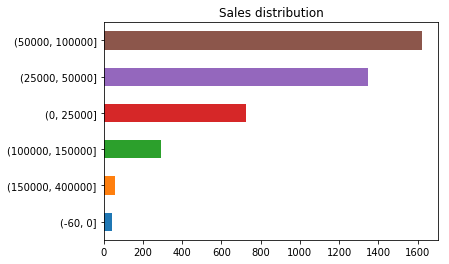

In [10]:
dfsales = storedf.pivot_table(index='Store Nbr',values='Total Sales',aggfunc=np.sum)
def sales_dist(data):
    sales_df = data.copy(deep=True)
    sales_df['Qty_bins'] = pd.cut(sales_df['Total Sales'], [-60,0,25000,50000,100000,150000,400000])
    print('Max sale:', sales_df['Total Sales'].max())
    print('Min sale:', sales_df['Total Sales'].min())
    print('Avg sale:', sales_df['Total Sales'].mean())
    print()
    return sales_df

sales_df = sales_dist(dfsales)

total_points = pd.value_counts(sales_df.Qty_bins).sum()
print('Sales bucket v/s Count of Store:')
display(pd.value_counts(sales_df['Qty_bins']))
display(pd.value_counts(sales_df['Qty_bins']).apply(lambda s: (s/total_points)*100))
sales_count = pd.value_counts(sales_df['Qty_bins'])
sales_count.sort_values(ascending=True).plot(kind='barh', title='Sales distribution', );

## State Level Sales

In [11]:
for x in state.columns:
    state[x] = state[x].astype(str)

scl = [
    [0.0, 'rgb(163,163,163)'],
    [0.1, 'rgb(165,129,154)'],
    [0.2, 'rgb(124,77,109)'],
    [0.3, 'rgb(89,31,70)'],
    [0.4, 'rgb(183,42,138)'],
    [0.5, 'rgb(234,14,164)'],
    [0.6, 'rgb(255,166,112)'],
    [0.7, 'rgb(239,157,16)'],
    [0.8, 'rgb(193,178,15)'],
    [0.9, 'rgb(255,233,0)'],
    [1.0, 'rgb(255,7,77)']
]

state['text'] = state['State'] + '<br>' + \
    "Total Sales"

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = state['State'],
    z = state['Total Sales'].astype(float),
    locationmode = 'USA-states',
    text = state['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Millions USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2019SS Sales by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

C:\Users\gmjj0\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [12]:
state2['Avg Sales per Store'] = state2['Total Sales'] / state2['Store Nbr']
state2.round()

,Store Nbr,Total Sales,Avg Sales per Store
State,,,
AK,9.0,"276,224.0","30,692.0"
AL,105.0,"5,038,824.0","47,989.0"
AR,85.0,"2,976,960.0","35,023.0"
AZ,89.0,"6,033,067.0","67,787.0"
CA,222.0,"17,680,004.0","79,640.0"
CO,77.0,"2,803,521.0","36,409.0"
CT,33.0,"1,846,979.0","55,969.0"
DC,3.0,"255,695.0","85,232.0"
DE,9.0,"615,748.0","68,416.0"


### Sales distribution Zone is decided by weather in the US, black dots represent stores.
### Most of sales comes from zone 30 to 80.

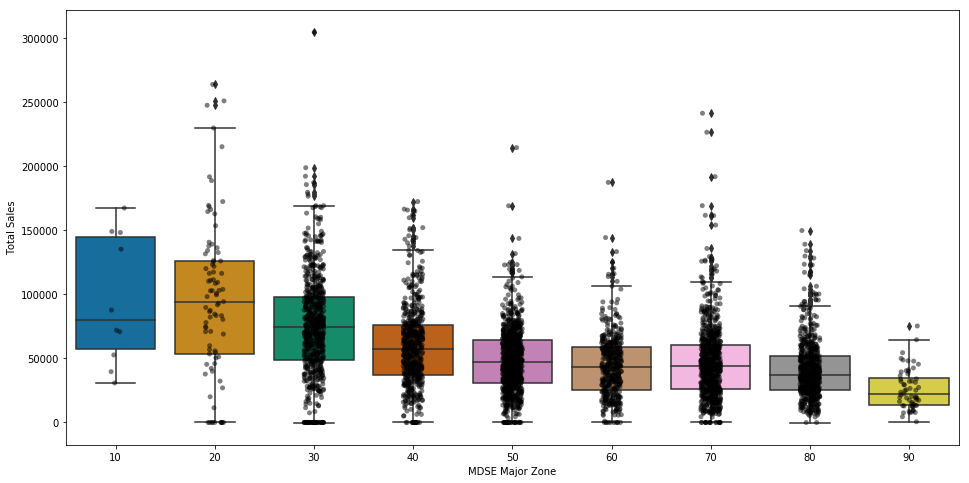

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
zonebox = sns.boxplot(y='Total Sales', x='MDSE Major Zone',data=zoneboxdf,width=0.8,palette="colorblind")
bplot=sns.stripplot(y='Total Sales', x='MDSE Major Zone',data=zoneboxdf,jitter=True,marker='o',alpha=0.5,color='black')

In [14]:
zoneboxdf.groupby('MDSE Major Zone')['Store Nbr'].count()

MDSE Major Zone
10     10
20     85
30    691
40    563
50    870
60    434
70    763
80    606
90     60
Name: Store Nbr, dtype: int64

### Sales distribution by Store department size. 1 to 8 means smallest to largest. from the below graph, we observe that sales are affected by store size, however, another factor to consider is actual square footage for apparel department.

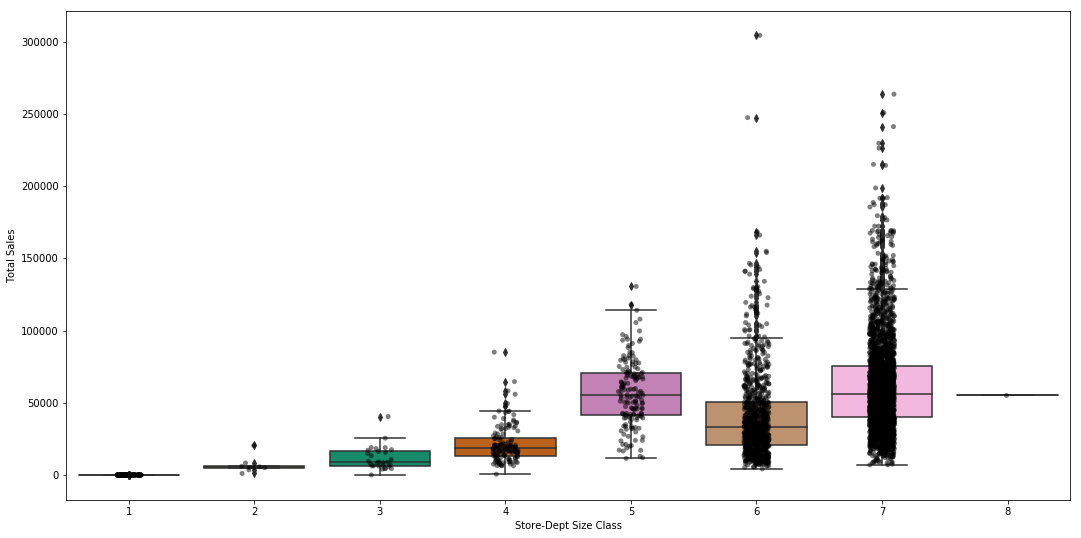

In [15]:
storesizedf = storedf.pivot_table(index=['Store Nbr','Store-Dept Size Class'], values='Total Sales',aggfunc=np.sum).reset_index()
fig, ax = plt.subplots(figsize=(18,9))
storesize = sns.boxplot(y='Total Sales', x='Store-Dept Size Class',data=storesizedf,width=0.8,palette="colorblind")
bplot=sns.stripplot(y='Total Sales', x='Store-Dept Size Class',data=storesizedf,jitter=True,marker='o',alpha=0.5,color='black')

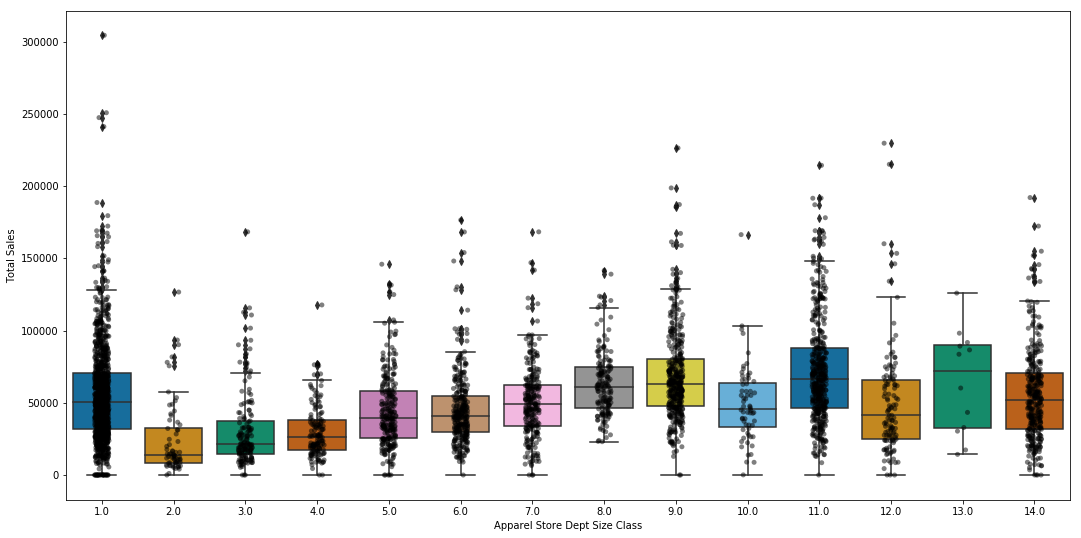

In [16]:
fig, ax = plt.subplots(figsize=(18,9))
apparelbox = sns.boxplot(y='Total Sales', x='Apparel Store Dept Size Class',data=apparelboxdf,width=0.8,palette="colorblind")
bplot=sns.stripplot(y='Total Sales', x='Apparel Store Dept Size Class',data=apparelboxdf,jitter=True,marker='o',alpha=0.5,color='black')

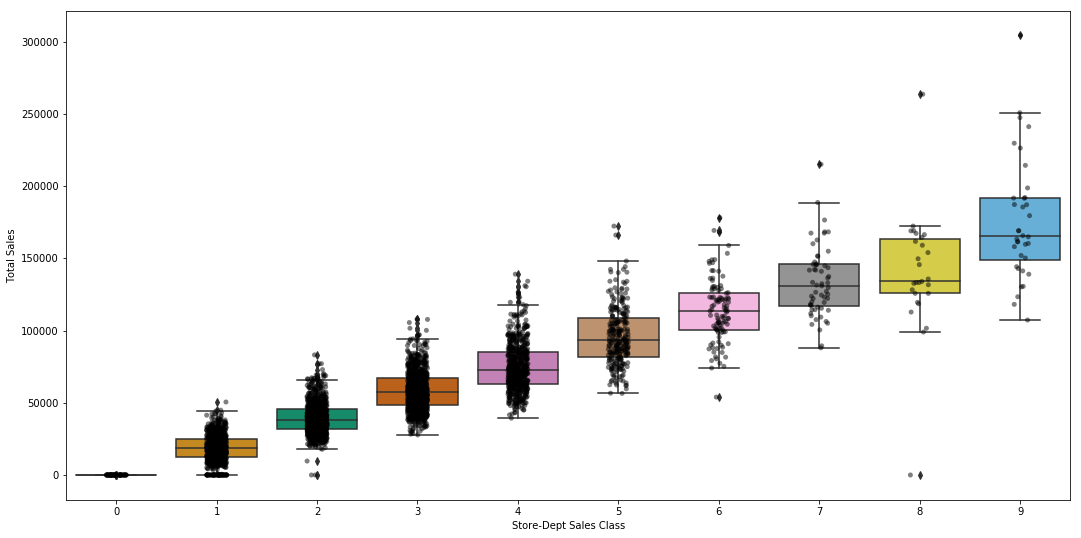

In [17]:
storesaledf = storedf.pivot_table(index=['Store Nbr','Store-Dept Sales Class'], values='Total Sales',aggfunc=np.sum).reset_index()
fig, ax = plt.subplots(figsize=(18,9))
storesale = sns.boxplot(y='Total Sales', x='Store-Dept Sales Class',data=storesaledf,width=0.8,palette="colorblind")
bplot=sns.stripplot(y='Total Sales', x='Store-Dept Sales Class',data=storesaledf,jitter=True,marker='o',alpha=0.5,color='black')

## Week-to-Week Sales Update for Women's Department

#### Women's sales by class are evenly distributed. Even though the highest number of sales for Women's department is lower than those of Men's and Accessory departments, Women's department presents the highest gross margin and GMROI compared to the rest of the two departments.

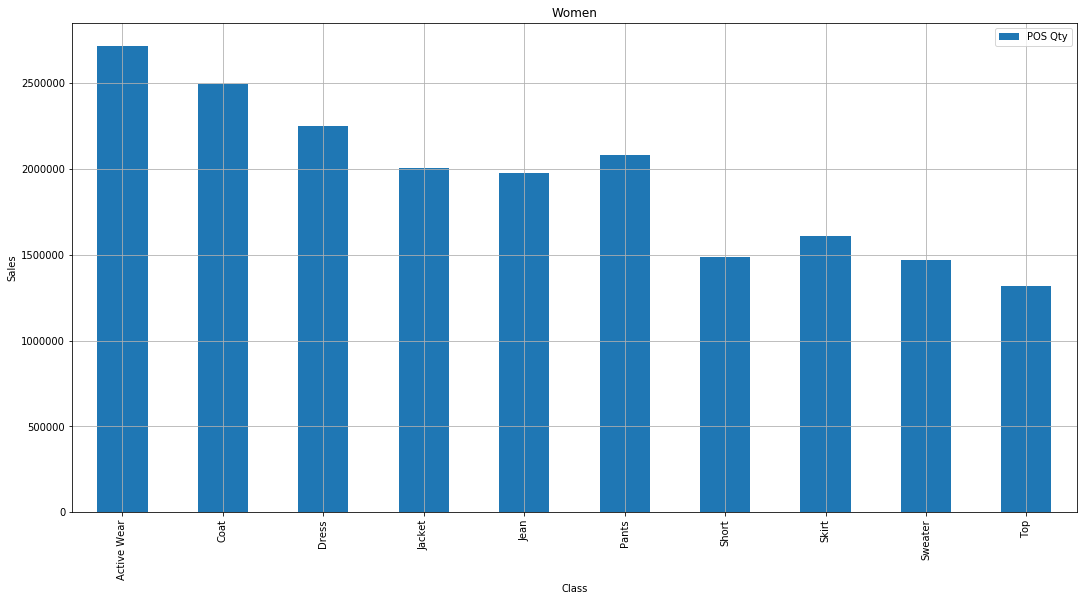

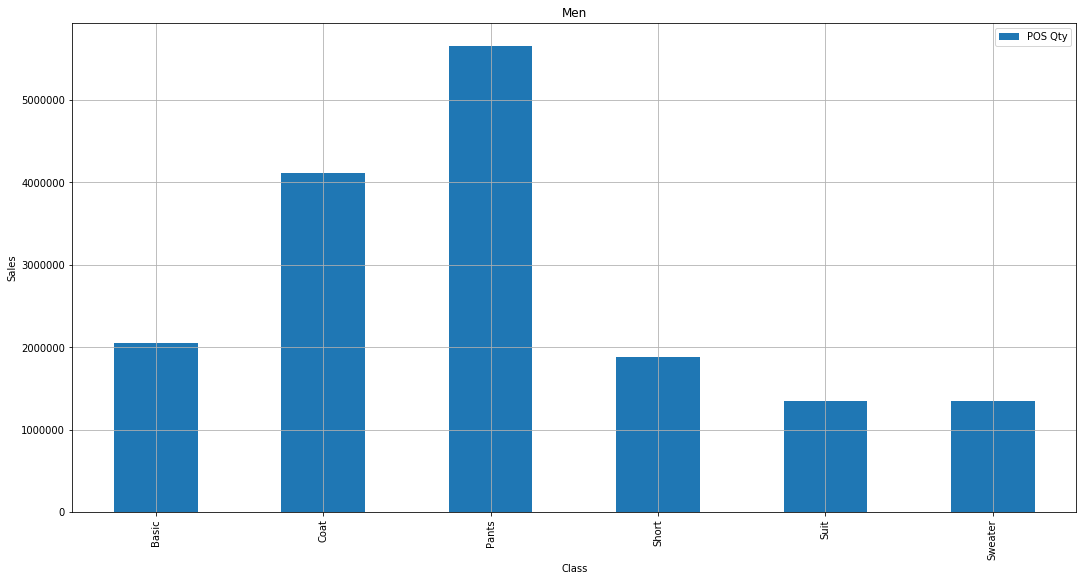

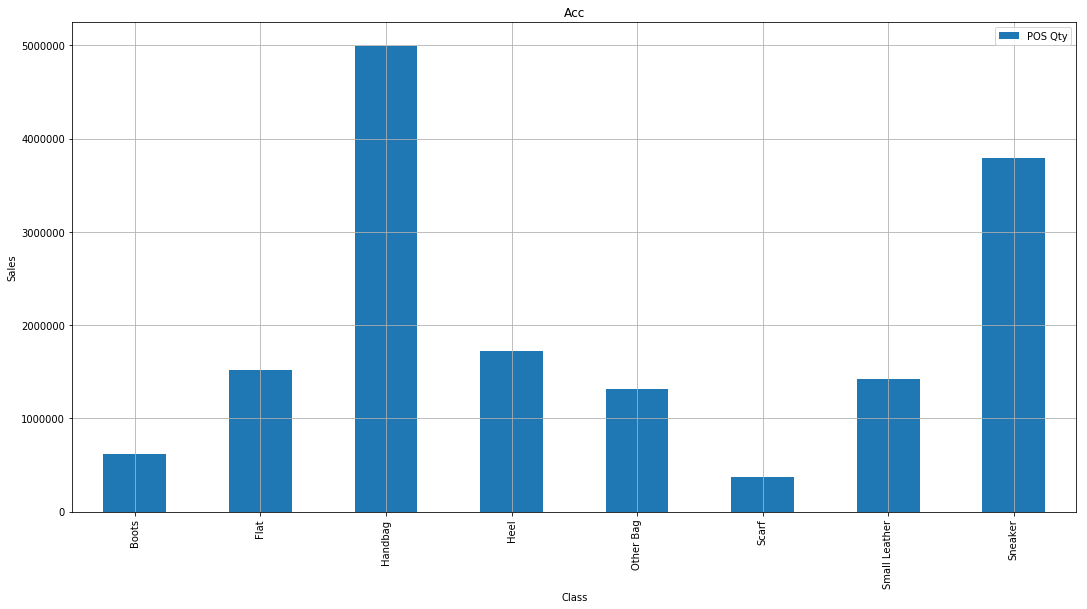

In [18]:
departmentclass = df2019.pivot_table(index=['Department','Class'],values='POS Qty',aggfunc=np.sum)
departmentlist= ['Women','Men','Acc']
for x in departmentlist:
    departmentclass.loc[x].plot(kind='bar',figsize=(18,9))
    plt.xlabel('Class')
    plt.ylabel('Sales')
    plt.title(x)
    plt.grid()
    plt.show()

## Women's Department Report
### Daily,Weekly,Monthly and yearly reports vs planned

In [19]:
historymonth

Year,2019,19 Var LY,19 Var LM,2018,18 Var LY,18 Var LM,2017,17 Var LY,17 Var LM,2016,16 Var LY,16 Var LM,2015,15 Var LY,15 Var LM,2014,14 Var LM
Month,,,,,,,,,,,,,,,,,
Feb,"12,565,747.0",-7.34%,nan%,"13,561,254.0",8.18%,nan%,"12,535,422.0",14.92%,nan%,"10,908,098.0",54.23%,nan%,"7,072,635.0",225.50%,nan%,"2,172,874.0",nan%
Mar,"19,060,619.0",5.24%,51.69%,"18,111,821.0",6.51%,33.56%,"17,004,837.0",18.11%,35.65%,"14,397,122.0",34.82%,31.99%,"10,679,056.0",246.54%,50.99%,"3,081,595.0",41.82%
Apr,"16,052,808.0",24.49%,-15.78%,"12,894,764.0",-14.10%,-28.80%,"15,011,459.0",33.35%,-11.72%,"11,257,231.0",47.42%,-21.81%,"7,636,244.0",166.87%,-28.49%,"2,861,414.0",-7.15%
May,"3,585,448.0",-78.16%,-77.66%,"16,418,222.0",40.83%,27.32%,"11,658,277.0",8.78%,-22.34%,"10,717,512.0",40.36%,-4.79%,"7,635,547.0",173.84%,-0.01%,"2,788,318.0",-2.55%
Jun,nan,0.00%,0.00%,"15,463,790.0",20.33%,-5.81%,"12,851,494.0",36.34%,10.23%,"9,425,892.0",18.37%,-12.05%,"7,963,403.0",175.25%,4.29%,"2,893,167.0",3.76%
Jul,nan,0.00%,0.00%,"13,368,621.0",14.16%,-13.55%,"11,710,270.0",-1.49%,-8.88%,"11,887,307.0",68.95%,26.11%,"7,036,178.0",145.72%,-11.64%,"2,863,464.0",-1.03%
Aug,nan,0.00%,0.00%,"13,826,526.0",18.27%,3.43%,"11,690,673.0",22.06%,-0.17%,"9,577,879.0",43.67%,-19.43%,"6,666,795.0",98.83%,-5.25%,"3,353,044.0",17.10%
Sep,nan,0.00%,0.00%,"15,351,429.0",-6.39%,11.03%,"16,399,650.0",22.95%,40.28%,"13,338,647.0",24.65%,39.27%,"10,701,162.0",72.29%,60.51%,"6,211,048.0",85.24%
Oct,nan,0.00%,0.00%,"17,046,985.0",20.72%,11.04%,"14,121,416.0",0.02%,-13.89%,"14,118,411.0",25.45%,5.85%,"11,254,404.0",97.62%,5.17%,"5,695,116.0",-8.31%


In [20]:
mlist=['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec', 'Jan']
line2014 = go.Scatter(x = historymonth.index, y = historymonth['2014'], name='2014'
                     )
line2015 = go.Scatter(x = historymonth.index, y = historymonth['2015'], name='2015'
                     )
line2016 = go.Scatter(x = historymonth.index, y = historymonth['2016'], name='2016'
                     )
line2017 = go.Scatter(x = historymonth.index, y = historymonth['2017'], name='2017'
                     )
line2018 = go.Scatter(x = historymonth.index, y = historymonth['2018'], name='2018'
                     )
line2019 = go.Scatter(x = historymonth.index, y = historymonth['2019'], name='2019'
                     )
data = [line2014,line2015,line2016,line2017,line2018,line2019]
py.iplot(data)

C:\Users\gmjj0\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [21]:
historyweek.loc[['12.0','13.0','14.0','15.0','16.0']]

Year,2014,2015,2016,2017,2018,2019
Week,,,,,,
12.0,"696,719.0","1,892,443.0","3,109,209.0","3,959,447.0","3,080,248.0","4,428,141.0"
13.0,"671,509.0","1,746,388.0","2,964,460.0","3,133,057.0","3,224,027.0","3,929,410.0"
14.0,"730,277.0","2,265,680.0","2,812,912.0","3,097,503.0","4,333,040.0","3,585,448.0"
15.0,"701,620.0","1,915,888.0","2,601,493.0","2,708,896.0","4,523,751.0",nan
16.0,"684,575.0","1,797,470.0","2,512,843.0","3,066,268.0","3,856,785.0",nan


In [22]:
mlist=['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec', 'Jan']
line2014 = go.Scatter(x = historyweek.index, y = historyweek['2014'], name='2014'
                     )
line2015 = go.Scatter(x = historyweek.index, y = historyweek['2015'], name='2015'
                     )
line2016 = go.Scatter(x = historyweek.index, y = historyweek['2016'], name='2016'
                     )
line2017 = go.Scatter(x = historyweek.index, y = historyweek['2017'], name='2017'
                     )
line2018 = go.Scatter(x = historyweek.index, y = historyweek['2018'], name='2018'
                     )
line2019 = go.Scatter(x = historyweek.index, y = historyweek['2019'], name='2019'
                     )
data = [line2014,line2015,line2016,line2017,line2018,line2019]
py.iplot(data)

C:\Users\gmjj0\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [23]:
totaldaily.loc['16.0']

,Sat Qty,Sat %,Sun MV 4YR,Sun Qty,Sun %,Mon MV 4YR,Mon Qty,Mon %,Tue MV 4YR,Tue Qty,...,Wed Qty,Wed %,Thu MV 4YR,Thu Qty,Thu %,Fri MV 4YR,Fri Qty,Fri %,Sat MV 4YR,Total Qty
Year,,,,,,,,,,,,,,,,,,,,,
2014,"130,861.0",4.40%,-33.34%,"98,996.0",-32.19%,-26.94%,"73,241.0",-35.16%,0.49%,"77,989.0",...,"83,019.0",6.06%,4.98%,"95,364.0",12.95%,21.17%,"125,105.0",23.77%,15.81%,"684,575.0"
2015,"363,672.0",17.39%,-25.68%,"292,308.0",-24.41%,-34.06%,"208,698.0",-40.06%,1.16%,"201,457.0",...,"209,676.0",3.92%,5.65%,"221,236.0",5.23%,20.78%,"300,423.0",26.36%,16.21%,"1,797,470.0"
2016,"529,469.0",18.25%,-25.81%,"391,474.0",-35.25%,-35.18%,"275,589.0",-42.05%,0.19%,"267,553.0",...,"289,433.0",7.56%,5.65%,"326,501.0",11.35%,21.79%,"432,824.0",24.56%,17.00%,"2,512,843.0"
2017,"523,742.0",-8.11%,-29.22%,"349,549.0",-49.83%,-37.35%,"357,064.0",2.10%,-0.55%,"382,180.0",...,"417,755.0",8.52%,7.99%,"469,761.0",11.07%,23.47%,"566,217.0",17.04%,16.06%,"3,066,268.0"
2018,"746,210.0",12.42%,-35.42%,"477,501.0",-56.27%,-28.79%,"465,822.0",-2.51%,1.52%,"485,082.0",...,"492,443.0",1.49%,10.15%,"536,174.0",8.16%,22.93%,"653,553.0",17.96%,7.98%,"3,856,785.0"
2019,"599,888.0",100.00%,-41.44%,"358,410.0",-67.37%,-20.63%,0.0,-inf%,0.99%,0.0,...,0.0,nan%,8.95%,0.0,nan%,21.48%,0.0,nan%,9.99%,"958,298.0"


In [24]:
daily

,,Sat Qty,Sat %,Sun MV 4YR,Sun Qty,Sun %,Mon MV 4YR,Mon Qty,Mon %,Tue MV 4YR,Tue Qty,...,Wed Qty,Wed %,Thu MV 4YR,Thu Qty,Thu %,Fri MV 4YR,Fri Qty,Fri %,Sat MV 4YR,Total Qty
Week,Year,,,,,,,,,,,,,,,,,,,,,
48.0,2018,"12,671.0",-167.54%,nan%,"18,774.0",32.51%,nan%,"18,850.0",0.40%,nan%,0.0,...,"17,321.0",100.00%,nan%,"23,259.0",25.53%,nan%,"33,900.0",31.39%,nan%,"124,775.0"
49.0,2018,"39,704.0",-93.71%,nan%,"36,846.0",-7.76%,nan%,"35,575.0",-3.57%,nan%,"34,191.0",...,"42,611.0",19.76%,nan%,"57,006.0",25.25%,nan%,"76,911.0",25.88%,nan%,"322,844.0"
50.0,2018,"94,298.0",-21.23%,nan%,"73,980.0",-27.46%,nan%,"65,888.0",-12.28%,nan%,"73,456.0",...,"74,636.0",1.58%,nan%,"84,981.0",12.17%,nan%,"114,316.0",25.66%,nan%,"581,555.0"
51.0,2018,"135,318.0",-6.95%,nan%,"109,064.0",-24.07%,nan%,"80,976.0",-34.69%,nan%,"82,588.0",...,"89,232.0",7.45%,nan%,"101,190.0",11.82%,nan%,"144,719.0",30.08%,nan%,"743,087.0"
52.0,2018,"150,835.0",-1.98%,-6.70%,"106,132.0",-42.12%,-12.53%,"86,775.0",-22.31%,nan%,"85,240.0",...,"92,743.0",8.09%,18.69%,"108,333.0",14.39%,28.25%,"153,823.0",29.57%,-72.36%,"783,881.0"
01.0,2019,"191,367.0",-43.62%,-25.35%,"154,317.0",-24.01%,-18.21%,"119,640.0",-28.98%,1.60%,"115,037.0",...,"120,487.0",4.52%,15.91%,"157,072.0",23.29%,27.80%,"274,843.0",42.85%,-30.97%,"1,132,763.0"
02.0,2019,"340,316.0",3.65%,-29.42%,"260,597.0",-30.59%,-24.56%,"212,291.0",-22.75%,1.61%,"224,625.0",...,"237,778.0",5.53%,15.42%,"269,780.0",11.86%,32.04%,"327,882.0",17.72%,-18.44%,"1,873,269.0"
03.0,2019,"382,631.0",3.86%,-30.20%,"295,492.0",-29.49%,-27.18%,"220,505.0",-34.01%,0.41%,"227,171.0",...,"316,296.0",28.18%,15.34%,"250,196.0",-26.42%,30.06%,"367,868.0",31.99%,-12.22%,"2,060,159.0"
04.0,2019,"436,593.0",-26.80%,-31.55%,"324,086.0",-34.72%,-27.01%,"243,100.0",-33.31%,0.66%,"214,055.0",...,"243,133.0",11.96%,5.78%,"336,405.0",27.73%,30.53%,"553,579.0",39.23%,-9.52%,"2,350,951.0"


## Color & Size Level
#### Color and size level information can be conveniently displayed by zone and by class to identify trends.

In [25]:
sizedf = df2019.pivot_table(index=['Size Desc'], values=['Total Qty','Net Ship Qty'],aggfunc=np.sum).reindex(['00','0','1','2','4','6', '8', '10', '12'])
sizedf['Sell-Th at Net Ship'] = sizedf['Total Qty'] / sizedf['Net Ship Qty']
sizedf['Sell-Th at Net Ship'] = sizedf['Sell-Th at Net Ship'].astype(float).map("{:.2%}".format)
sizedf = sizedf.round(0)
sizedf

,Net Ship Qty,Total Qty,Sell-Th at Net Ship
Size Desc,,,
00,"3,918,000.0","2,065,893.0",52.73%
0,"4,039,224.0","2,164,138.0",53.58%
1,"4,910,385.0","2,866,179.0",58.37%
2,"6,364,961.0","3,887,204.0",61.07%
4,"7,493,869.0","4,846,572.0",64.67%
6,"18,745,968.0","11,209,964.0",59.80%
8,"14,986,480.0","9,706,725.0",64.77%
10,"12,846,979.0","8,330,833.0",64.85%
12,"10,950,763.0","6,941,984.0",63.39%


In [26]:
colordf = df2019[['Color Desc','Total Qty','Net Ship Qty']]
colordf = colordf.pivot_table(index='Color Desc',values=['Total Qty','Net Ship Qty'],aggfunc=np.sum)
colordf['Sell-Th'] = colordf['Total Qty'] / colordf['Net Ship Qty']
colordf['Sell-Th'] = colordf['Sell-Th'].astype(float).map("{:.2%}".format)
colordf.head(10)

,Net Ship Qty,Total Qty,Sell-Th
Color Desc,,,
50ULB2,"178,719.0","108,159.0",60.52%
50ULBL,"1,016,370.0","673,190.0",66.23%
AGVRDE,"3,913,172.0","2,322,914.0",59.36%
APLLO,"1,554,487.0","951,376.0",61.20%
APOLLO,"1,071,550.0","604,827.0",56.44%
AQCBLU,"1,296,284.0","1,016,910.0",78.45%
ARCWH2,"652,138.0","393,078.0",60.28%
ARCWHT,"9,031,132.0","5,645,350.0",62.51%
BAJBLU,"1,449,138.0","905,282.0",62.47%


In [27]:
color_graph = go.Bar(x = colordf.index , y = colordf['Total Qty'] , name="Total Qty")
color_graph2 = go.Bar(x = colordf.index, y = colordf['Net Ship Qty'], name = 'Net Ship Qty')
total_color = [color_graph,color_graph2]
layout = go.Layout(barmode='group',title=go.layout.Title(text='Color Distribution',xref='paper',x=0),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Color',font=dict(family='Courier New, monospace',
    size=18,color='#7f7f7f'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='POS Qty',font=dict(family='Courier New, monospace',
                size=18,color='#7f7f7f'))))
fig = go.Figure(data=total_color,layout=layout)
py.iplot(fig)

C:\Users\gmjj0\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Net Ship Qty  POS Qty Sell-Thru of total Net ship Qty  \
MDSE Major Zone Class                                                           
10              Dress          16867     6825                          40.46%   
                Jacket         16990     9178                          54.02%   
                Jean           21122     9697                          45.91%   
                Pants          16815     7674                          45.64%   
20              Dress         144059    91236                          63.33%   
                Jacket        126356    78463                          62.10%   
                Jean          143742    83497                          58.09%   
                Pants         146862    89808                          61.15%   
30              Dress         774334   465612                          60.13%   
                Jacket        686511   411203                          59.90%   
                Jean          723490   428992                          59.29%   
                Pants         749602   416738                          55.59%   
40              Dress         505053   292902                          57.99%   
                Jacket        436895   255809                          58.55%   
                Jean          440735   256112                          58.11%   
                Pants         489551   256955                          52.49%   
50              Dress         643451   353432                          54.93%   
                Jacket        546934   301314                          55.09%   
                Jean          535160   289256                          54.05%   
                Pants         638203   314772                          49.32%   
60              Dress         297877   160574                          53.91%   
                Jacket        265566   144754                          54.51%   
                Jean          243975   129034                          52.89%   
                Pants         305574   151287                          49.51%   
70              Dress         562347   309173                          54.98%   
                Jacket        497500   270152                          54.30%   
                Jean          441231   228018                          51.68%   
                Pants         585627   296853                          50.69%   
80              Dress         421949   219681                          52.06%   
                Jacket        359712   179757                          49.97%   
                Jean          313989   139293                          44.36%   
                Pants         434897   209710                          48.22%   
90              Dress          31614    14225                          45.00%   
                Jacket         26228    10986                          41.89%   
                Jean           23648     7818                          33.06%   
                Pants          31980    13139                          41.09%   

                           EOH  
MDSE Major Zone Class           
10              Dress    10042  
                Jacket    7812  
                Jean     11425  
                Pants     9141  
20              Dress    52823  
                Jacket   47893  
                Jean     60245  
                Pants    57054  
30              Dress   308722  
                Jacket  275308  
                Jean    294498  
                Pants   332864  
40              Dress   212151  
                Jacket  181086  
                Jean    184623  
                Pants   232596  
50              Dress   290019  
                Jacket  245620  
                Jean    245904  
                Pants   323431  
60              Dress   137303  
                Jacket  120812  
                Jean    114941  
                Pants   154287  
70              Dress   253174  
                Jacket  227348  
                Jean 

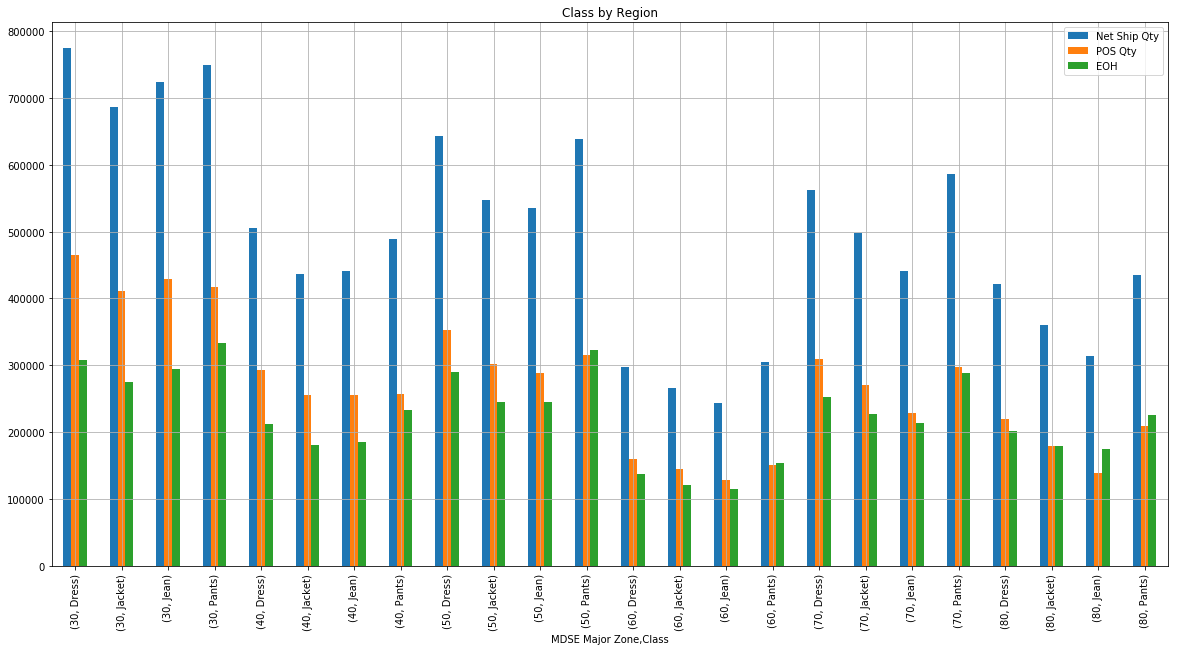

In [28]:
zone2019 = pd.pivot_table(index = ['MDSE Major Zone','Class'],values=['POS Qty','Net Ship Qty'],data=dfzone2019,aggfunc=np.sum)
zone2019['Sell-Thru of total Net ship Qty'] = zone2019['POS Qty'] / zone2019.groupby(['MDSE Major Zone','Class'])['Net Ship Qty'].cumsum()
zone2019['Sell-Thru of total Net ship Qty'] = pd.Series(["{0:.2f}%".format(val * 100) for val in zone2019['Sell-Thru of total Net ship Qty']], index=zone2019.index)
zone2019['EOH'] = zone2019['Net Ship Qty'] - zone2019['POS Qty']
zone2019.loc[[30,40,50,60,70,80]].plot(kind='bar',figsize=(20,10))
plt.title("Class by Region")
plt.grid()
zone2019

POS Qty                        
Class             Dress  Jacket    Jean   Pants
MDSE Major Zone                                
10                 6825    9178    9697    7674
20                91236   78463   83497   89808
30               465612  411203  428992  416738
40               292902  255809  256112  256955
50               353432  301314  289256  314772
60               160574  144754  129034  151287
70               309173  270152  228018  296853
80               219681  179757  139293  209710
90                14225   10986    7818   13139

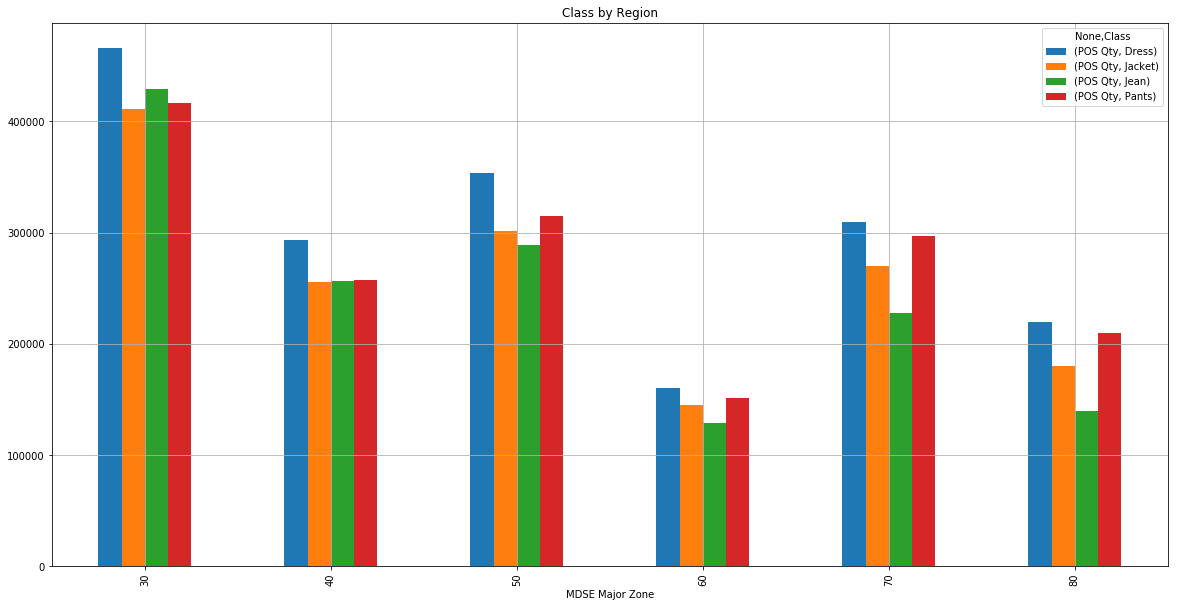

In [29]:
zone2019 = pd.pivot_table(index = ['MDSE Major Zone'],columns= 'Class',values=['POS Qty'],data=dfzone2019,aggfunc=np.sum)
#zone2019['Sell-Thru of total Net ship Qty'] = zone2019['POS Qty'] / zone2019.groupby(['MDSE Major Zone','Class'])['Net Ship Qty'].cumsum()
#zone2019['Sell-Thru of total Net ship Qty'] = pd.Series(["{0:.2f}%".format(val * 100) for val in zone2019['Sell-Thru of total Net ship Qty']], index=zone2019.index)
#zone2019['EOH'] = zone2019['Net Ship Qty'] - zone2019['POS Qty']
#zone2019['%'] = zone2019['Dress'] / (zone2019['Dress'] + zone2019['Jacket'] + zone2019['Jean'] + zone2019['Pants'])
zone2019.loc[[30,40,50,60,70,80]].plot(kind='bar',figsize=(20,10))
plt.title("Class by Region")
plt.grid()
zone2019

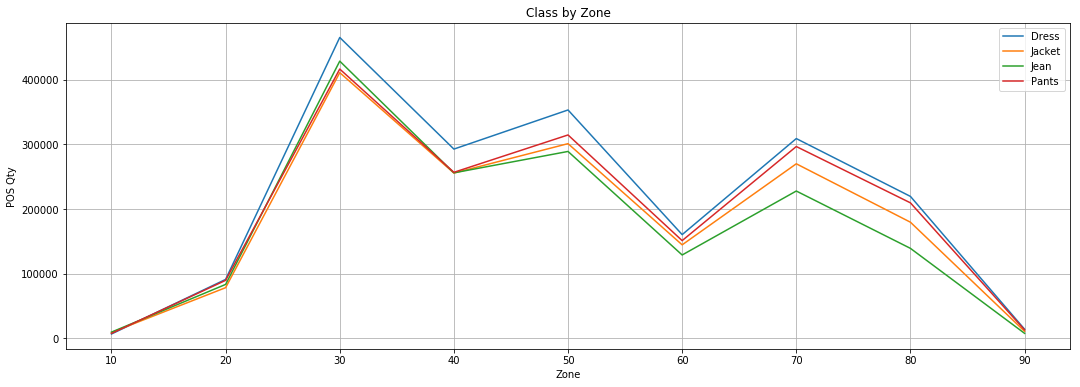

In [30]:
zonelist = ['10','20','30','40','50','60','70','80','90']
zone = pd.pivot_table(index = ['MDSE Major Zone','Class'],values=['POS Qty'],data=dfzone2019,aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(18,6))

for label, grp in zone.groupby('Class')['POS Qty']:
    grp.plot(x = zone.index, y = 'POS Qty', ax = ax, label = label, legend = label)
y_pos = np.arange(len(zonelist))
plt.xlabel('Zone')
plt.ylabel('POS Qty')
plt.title('Class by Zone')
plt.xticks(y_pos,zonelist)
plt.grid()
plt.show()    

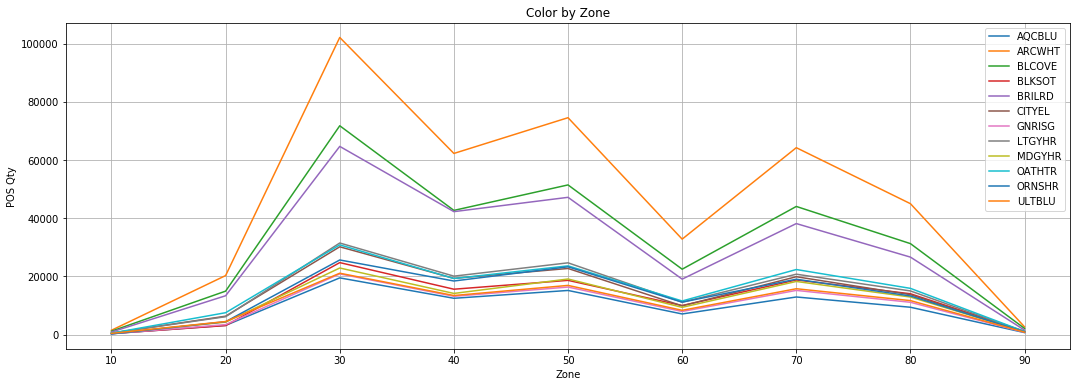

In [31]:
zonedresscolor = pd.pivot_table(index = ['Class','MDSE Major Zone','Color Desc'],values=['POS Qty'],data=dfzone2019,aggfunc=np.sum)
zonedress = zonedresscolor.loc['Dress']
fig, ax = plt.subplots(figsize=(18,6))
for label, grp in zonedress.groupby('Color Desc')['POS Qty']:
    grp.plot(x = zonedress.index.unique(level='MDSE Major Zone'), y = 'POS Qty', ax = ax, label = label, legend = label)
y_pos = np.arange(len(zonelist))
plt.xlabel('Zone')
plt.ylabel('POS Qty')
plt.title('Color by Zone')
plt.xticks(y_pos,zonelist)
plt.grid()
plt.show() 

## Women's Department Missing opportunity & Zero Sales Issue
### One of the most common issues that retail companies have is item shortage. Such shortage could occur in colors, sizes, quantities shipped to stores, etc. By examining the dataset, this issue can be easily identified and be used to assist decision-making.

In [32]:
print('Total 3953 Stores have shortage by Size Level')
print('Size Level')
print(missing_size['Size Desc'].value_counts(normalize=True).round(2))
print('Class Level (across sizes) - Jacket 28%, Dress 22%, Jean 21%, Skirt 10%')
print('\n')
print('Total 938 Stores have shortage by Color Level')
#print('Shortage by Color Level')
print('Class Level (across sizes) - Jacket 32%, Dress 16%, Jean - 12%, Skirt - 9%')

Total 3953 Stores have shortage by Size Level
Size Level
1    0.18
0    0.18
6    0.17
00   0.16
4    0.15
2    0.15
Name: Size Desc, dtype: float64
Class Level (across sizes) - Jacket 28%, Dress 22%, Jean 21%, Skirt 10%


Total 938 Stores have shortage by Color Level
Class Level (across sizes) - Jacket 32%, Dress 16%, Jean - 12%, Skirt - 9%


### Below table shows the number of stores that do not have the corresponding merchandises and thus missing sales opportunities. Inventory refers to the total quantity of items in stores that do have those merchandises allocated.

In [33]:
missing_size.pivot_table(index=['Class','Color Desc','Size Desc'],values=['Inventory','EOH'],aggfunc={'Inventory':np.sum,'EOH':'count'}).rename(columns={'EOH':'Number of Store'})

Number of Store   Inventory
Class       Color Desc Size Desc                             
Active Wear APLLO      0                       17   578,697.0
                       00                       9   309,474.0
                       1                       23   825,125.0
                       2                       19   765,776.0
                       4                       38 1,548,462.0
                       6                       28 1,108,380.0
            ARCWHT     0                       11   518,375.0
                       00                      17   781,694.0
                       1                       12   605,280.0
                       2                       16   913,120.0
                       4                       17 1,058,488.0
                       6                        7   410,060.0
            BLCOVE     0                       33   534,204.0
                       00                      24   389,040.0
                       1                       35   682,360.0
                       2                       30   644,280.0
                       4                       30   697,170.0
                       6                       73 1,520,006.0
            GUMBAL     0                       16   657,664.0
                       00                      21   843,843.0
                       1                       19   794,295.0
                       2                       33 1,575,651.0
                       4                       37 1,888,406.0
                       6                       22 1,047,728.0
            PCHSMT     0                        6   224,316.0
                       00                       8   284,240.0
                       1                       10   384,830.0
                       2                        5   220,900.0
                       4                       21   934,878.0
                       6                       10   448,000.0
...                                           ...         ...
Top         BLKSOT     0                       74 1,437,894.0
                       00                      65 1,259,635.0
                       1                       38 1,025,696.0
                       2                       15   485,655.0
                       4                       12   408,732.0
                       6                       16   507,296.0
            BRILRD     0                       39   695,565.0
                       00                      49   797,524.0
                       1                       12   247,092.0
                       2                       10   265,710.0
                       4                       10   273,130.0
                       6                        7   176,421.0
            LTGYHR     0                       21   416,325.0
                       00                      22   418,946.0
                       1                       12   318,948.0
                       2                       22   638,968.0
                       4                       14   421,204.0
                       6                        9   242,091.0
            MDGYHR     0                       35   667,275.0
                       00                      30   554,850.0
                       1                       13   335,933.0
                       2                       10   298,660.0
                       4                       15   476,220.0
                       6                        9   255,645.0
            ULTBLU     0                       53   920,186.0
                       00                      39   673,257.0
                       1                       15   308,310.0
                       2                       22   567,776.0
                       4                       25   663,975.0
                       6                        8   204,968.0

[628 rows x 2 columns]

In [34]:
missing_size.pivot_table(index=['Class','Color Desc'],values=['Inventory','EOH'],aggfunc={'Inventory':np.sum,'EOH':'count'}).rename(columns={'EOH':'Number of Store'})

Number of Store    Inventory
Class       Color Desc                              
Active Wear APLLO                   134  5,135,914.0
            ARCWHT                   80  4,287,017.0
            BLCOVE                  225  4,467,060.0
            GUMBAL                  148  6,807,587.0
            PCHSMT                   60  2,497,164.0
            REDRVR                   61  2,358,533.0
            SNPDYW                  250  7,277,425.0
Coat        ARCWHT                  212  4,254,356.0
            BLCOVE                   89  3,754,788.0
            BLKSOT                   46  2,414,756.0
            BRILRD                   44  2,137,680.0
            CLDGRE                 1753 13,726,073.0
            GNRISG                   68  2,625,786.0
            MDGYHR                  581 10,083,067.0
            ORNSHR                   56  2,261,922.0
Dress       AQCBLU                 8771 30,057,255.0
            ARCWHT                   57  1,961,292.0
            BLCOVE                   16    642,829.0
            BLKSOT                 5656 32,011,918.0
            BRILRD                   29    954,302.0
            CITYEL                  729 10,584,606.0
            GNRISG                 6485 34,927,861.0
            LTGYHR                  117  2,342,541.0
            MDGYHR                 1940 22,781,611.0
            OATHTR                   87  1,889,158.0
            ORNSHR                 3923 28,042,352.0
            ULTBLU                   49  1,331,390.0
Jacket      AGVRDE                  500 14,644,978.0
            APLLO                   270  4,403,975.0
            ARCWHT                   65  1,419,493.0
...                                 ...          ...
Short       LTGYHR                  629  8,742,150.0
            RNBOW                  3423 23,755,150.0
Skirt       AQCBLU                 2070 20,156,804.0
            ARCWH2                  534  5,185,843.0
            ARCWHT                   49  1,037,028.0
            BLCOVE                   97  1,759,184.0
            BLKSOT                   50  1,012,604.0
            BRILRD                  224  4,656,401.0
            CITYEL                  334  3,223,661.0
            GNRISG                  449  4,681,003.0
            LTBLHT                  342  3,230,800.0
            LTGYHR                 2561 18,648,749.0
            MDGYHR                  341  6,713,319.0
            ORNSHR                 5430 26,340,429.0
            ULTBLU                  179  1,746,677.0
Sweater     AGVRDE                  495 14,296,623.0
            ARCWH2                 1708 13,464,302.0
            ARCWHT                  358  8,875,805.0
            BAJBLU                  415 11,750,475.0
            BBLGPK                  691 13,214,491.0
            BLKSOT                   35    663,845.0
            GUMBAL                  120  2,552,767.0
            RNBOW                  3924 22,490,821.0
            SNPDYW                  372  4,043,173.0
Top         BLCOVE                  391  8,819,220.0
            BLKSOT                  220  5,124,908.0
            BRILRD                  127  2,455,442.0
            LTGYHR                  100  2,456,482.0
            MDGYHR                  112  2,588,583.0
            ULTBLU                  162  3,338,472.0

[105 rows x 2 columns]